In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ( accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

In [2]:
X_train = pd.read_csv("E:/churn_prediction/data/X_train.csv")
X_val   = pd.read_csv("E:/churn_prediction/data/X_val.csv")
y_train = pd.read_csv("E:/churn_prediction/data/y_train.csv").values.ravel()
y_val   = pd.read_csv("E:/churn_prediction/data/y_val.csv").values.ravel()

X_train.shape, X_val.shape


((5634, 30), (1409, 30))

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [4]:
log_reg = LogisticRegression(
    solver="liblinear",
    max_iter=3000,
    class_weight="balanced",
    random_state=42
)

log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=3000, random_state=42,
                   solver='liblinear')

In [5]:
X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)
X_val_scaled = pd.DataFrame(
    X_val_scaled,
    columns=X_val.columns,
    index=X_val.index
)

In [6]:
y_train_pred = log_reg.predict(X_train_scaled)
y_val_pred = log_reg.predict(X_val_scaled)
y_val_prob = log_reg.predict_proba(X_val_scaled)[:,1]

In [7]:
print("Accuracy :", accuracy_score(y_val, y_val_pred))
print("Precision :", precision_score(y_val, y_val_pred))
print("Recall :", recall_score(y_val, y_val_pred))
print("F1-score :", f1_score(y_val, y_val_pred))
print("ROC-AUC :", roc_auc_score(y_val, y_val_pred)) 

Accuracy : 0.6650106458481192
Precision : 0.4343163538873995
Recall : 0.8663101604278075
F1-score : 0.5785714285714286
ROC-AUC : 0.7292903459143868


In [8]:
confusion_matrix(y_val, y_val_pred)

array([[613, 422],
       [ 50, 324]], dtype=int64)

In [9]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.92      0.59      0.72      1035
           1       0.43      0.87      0.58       374

    accuracy                           0.67      1409
   macro avg       0.68      0.73      0.65      1409
weighted avg       0.79      0.67      0.68      1409



In [10]:
pd.Series(y_val_pred).value_counts(normalize=True)

1    0.529454
0    0.470546
Name: proportion, dtype: float64

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)

In [13]:
y_train_pred_rf = rf.predict(X_train)
y_val_pred_rf = rf.predict(X_val)

In [14]:
y_val_prob_rf = rf.predict_proba(X_val)[:,1]

In [15]:
print("Random Forest Performance (Validation Set)")
print("-------------------------------------------")
print("Accuracy :", accuracy_score(y_val, y_val_pred_rf))
print("Precision:", precision_score(y_val, y_val_pred_rf))
print("Recall   :", recall_score(y_val, y_val_pred_rf))
print("F1-score :", f1_score(y_val, y_val_pred_rf))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_prob_rf))

Random Forest Performance (Validation Set)
-------------------------------------------
Accuracy : 0.7899219304471257
Precision: 0.6335616438356164
Recall   : 0.4946524064171123
F1-score : 0.5555555555555556
ROC-AUC  : 0.8259849130693121


In [16]:
confusion_matrix(y_val, y_val_pred_rf)

array([[928, 107],
       [189, 185]], dtype=int64)

In [17]:
print(classification_report(y_val, y_val_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [18]:
pd.Series(y_val_pred_rf).value_counts(normalize=True)

0    0.792761
1    0.207239
Name: proportion, dtype: float64

In [19]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Recall (Churn)": [
        recall_score(y_val, y_val_pred),
        recall_score(y_val, y_val_pred_rf)
    ],
    "Precision (Churn)": [
        precision_score(y_val, y_val_pred),
        precision_score(y_val, y_val_pred_rf)
    ],
    "ROC-AUC": [
        roc_auc_score(y_val,y_val_prob),
        roc_auc_score(y_val, y_val_prob_rf)
    ]
})

results

,Model,Recall (Churn),Precision (Churn),ROC-AUC
0,Logistic Regression,0.866310,0.434316,0.809251
1,Random Forest,0.494652,0.633562,0.825985


In [20]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance.head(10)

TotalCharges                      0.179577
tenure                            0.163862
MonthlyCharges                    0.150221
Contract_Two year                 0.059397
InternetService_Fiber optic       0.042907
PaymentMethod_Electronic check    0.037079
Contract_One year                 0.029199
OnlineSecurity_Yes                0.028920
gender_Male                       0.025836
PaperlessBilling_Yes              0.023857
dtype: float64

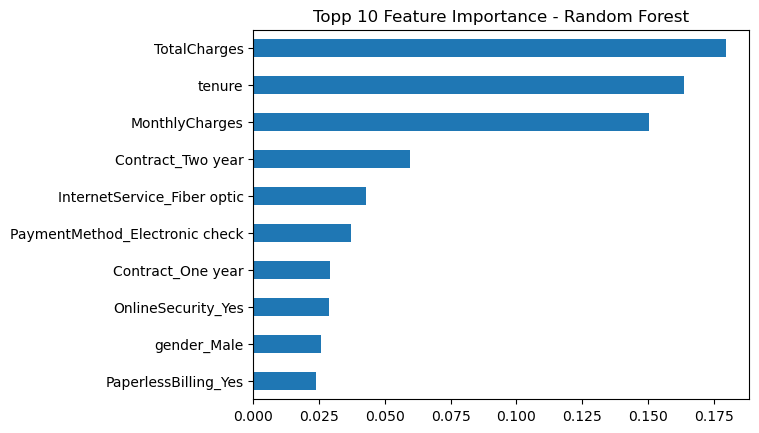

In [21]:
import matplotlib.pyplot as plt

feature_importance.head(10).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Topp 10 Feature Importance - Random Forest")
plt.show()

## Model Explainability (Permutation Importance & PDP)

In [27]:
from sklearn.inspection import permutation_importance

In [28]:
perm_importance = permutation_importance(
    rf,
    X_val,
    y_val,
    n_repeats= 10,
    random_state = 42,
    n_jobs= -1,
)
perm_df = pd.DataFrame({
    "feature": X_val.columns,
    "importance": perm_importance.importances_mean
}).sort_values(by="importance", ascending= False)

perm_df.head(10)

,feature,importance
1,tenure,0.022214
3,TotalCharges,0.015117
10,InternetService_Fiber optic,0.014620
25,Contract_Two year,0.009439
0,SeniorCitizen,0.005181
13,OnlineSecurity_Yes,0.004755
24,Contract_One year,0.004116
19,TechSupport_Yes,0.003407
26,PaperlessBilling_Yes,0.002768
20,StreamingTV_No internet service,0.001845


<Axes: title={'center': 'Top Features by Permutation Importance'}, ylabel='feature'>

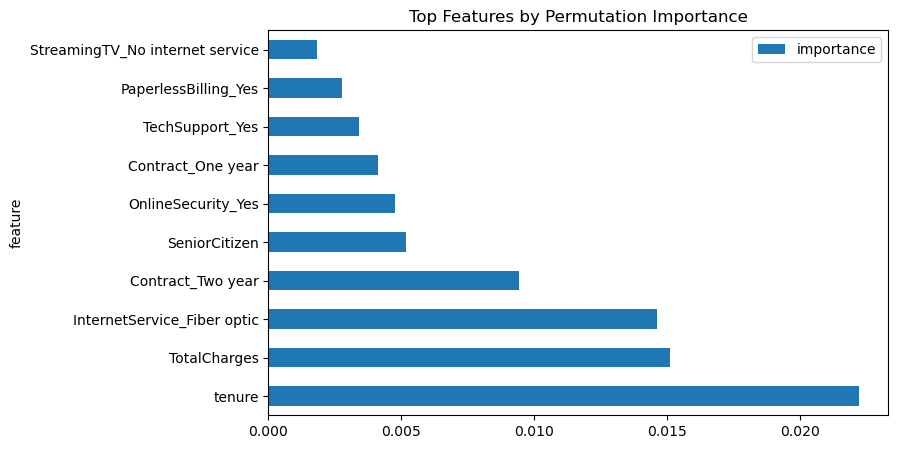

In [30]:
perm_df.head(10).plot(
    x="feature",
    y="importance",
    kind= "barh",
    figsize=(8,5),
    title="Top Features by Permutation Importance"
)

In [31]:
from sklearn.inspection import PartialDependenceDisplay

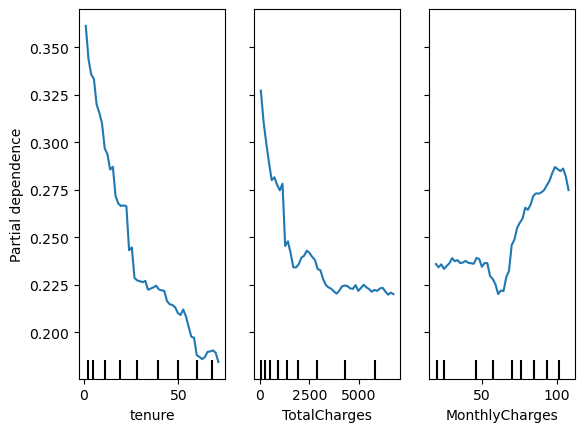

In [32]:
features = ["tenure", "TotalCharges", "MonthlyCharges"]

PartialDependenceDisplay.from_estimator(
    rf,
    X_val,
    features,
    kind="average",
    grid_resolution=50
)

## Final Model Summary

A Random Forest classifier was selected as the final model due to its superior ROC-AUC score and better balance between precision and recall compared to Logistic Regression.

Model explainability using permutation importance and partial dependence plots revealed that customer tenure, pricing, and contract structure are the primary drivers of churn. These insights can directly support customer retention and pricing strategy decisions.
